In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Import citipy
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

643

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47791be1e8e28c36edc448c5489921fb


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | konstantinovskiy
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | rundu
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | port macquarie
Processing Record 16 of Set 1 | eatonton
Processing Record 17 of Set 1 | ulaanbaatar
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | faya
Processing Record 22 of Set 1 | osypenko
Processing Re

Processing Record 37 of Set 4 | vilhena
Processing Record 38 of Set 4 | panji
Processing Record 39 of Set 4 | san jose
Processing Record 40 of Set 4 | prince albert
Processing Record 41 of Set 4 | tazovskiy
Processing Record 42 of Set 4 | qorveh
Processing Record 43 of Set 4 | leningradskiy
Processing Record 44 of Set 4 | taburi
City not found. Skipping...
Processing Record 45 of Set 4 | kununurra
Processing Record 46 of Set 4 | rapid valley
Processing Record 47 of Set 4 | pithoro
Processing Record 48 of Set 4 | vardo
Processing Record 49 of Set 4 | tateyama
Processing Record 50 of Set 4 | talara
Processing Record 1 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 2 of Set 5 | bow island
Processing Record 3 of Set 5 | ust-nera
Processing Record 4 of Set 5 | longyearbyen
Processing Record 5 of Set 5 | ust-maya
Processing Record 6 of Set 5 | mecca
Processing Record 7 of Set 5 | vicuna
Processing Record 8 of Set 5 | geraldton
Processing Record 9 of Set 5 | upernavik
Proces

Processing Record 24 of Set 8 | rafai
Processing Record 25 of Set 8 | touros
Processing Record 26 of Set 8 | son la
Processing Record 27 of Set 8 | ostersund
Processing Record 28 of Set 8 | yatou
Processing Record 29 of Set 8 | aklavik
Processing Record 30 of Set 8 | shrewsbury
Processing Record 31 of Set 8 | oga
Processing Record 32 of Set 8 | pocone
Processing Record 33 of Set 8 | los llanos de aridane
Processing Record 34 of Set 8 | springdale
Processing Record 35 of Set 8 | sept-iles
Processing Record 36 of Set 8 | muzquiz
City not found. Skipping...
Processing Record 37 of Set 8 | campo grande
Processing Record 38 of Set 8 | shagonar
Processing Record 39 of Set 8 | ilo
Processing Record 40 of Set 8 | jalingo
Processing Record 41 of Set 8 | catuday
Processing Record 42 of Set 8 | chaoyang
Processing Record 43 of Set 8 | milos
Processing Record 44 of Set 8 | yeppoon
Processing Record 45 of Set 8 | charters towers
Processing Record 46 of Set 8 | marsala
Processing Record 47 of Set 8 

Processing Record 16 of Set 12 | fort nelson
Processing Record 17 of Set 12 | berlevag
Processing Record 18 of Set 12 | takoradi
Processing Record 19 of Set 12 | babaeski
Processing Record 20 of Set 12 | karwar
Processing Record 21 of Set 12 | lalitpur
Processing Record 22 of Set 12 | phuket
Processing Record 23 of Set 12 | torrevieja
Processing Record 24 of Set 12 | boa vista
Processing Record 25 of Set 12 | bischofswerda
Processing Record 26 of Set 12 | tarudant
City not found. Skipping...
Processing Record 27 of Set 12 | san patricio
Processing Record 28 of Set 12 | nanchang
Processing Record 29 of Set 12 | stary sacz
Processing Record 30 of Set 12 | yokadouma
Processing Record 31 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 32 of Set 12 | tombouctou
Processing Record 33 of Set 12 | samusu
City not found. Skipping...
Processing Record 34 of Set 12 | luau
Processing Record 35 of Set 12 | vieux-habitants
Processing Record 36 of Set 12 | maymyo
Processing Record

In [10]:
len(city_data)

596

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,46.80,85,100,21.09,NZ,2022-04-21 16:51:22
1,Konstantinovskiy,57.8301,39.5899,55.11,65,5,5.91,RU,2022-04-21 16:51:23
2,Lebu,-37.6167,-73.6500,53.42,97,100,17.58,CL,2022-04-21 16:49:22
3,Jamestown,42.0970,-79.2353,51.39,76,100,14.97,US,2022-04-21 16:51:23
4,Saint-Philippe,-21.3585,55.7679,78.39,87,49,10.51,RE,2022-04-21 16:51:24
5,Dikson,73.5069,80.5464,2.10,98,99,12.12,RU,2022-04-21 16:51:25
6,Thompson,55.7435,-97.8558,30.36,37,20,10.36,CA,2022-04-21 16:51:25
7,Rundu,-17.9333,19.7667,66.74,47,28,5.26,NA,2022-04-21 16:51:26
8,Kodiak,57.7900,-152.4072,38.71,81,40,6.91,US,2022-04-21 16:51:26
9,New Norfolk,-42.7826,147.0587,49.50,70,48,2.95,AU,2022-04-21 16:51:27


In [12]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [13]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-04-21 16:51:22,-46.6000,168.3333,46.80,85,100,21.09
1,Konstantinovskiy,RU,2022-04-21 16:51:23,57.8301,39.5899,55.11,65,5,5.91
2,Lebu,CL,2022-04-21 16:49:22,-37.6167,-73.6500,53.42,97,100,17.58
3,Jamestown,US,2022-04-21 16:51:23,42.0970,-79.2353,51.39,76,100,14.97
4,Saint-Philippe,RE,2022-04-21 16:51:24,-21.3585,55.7679,78.39,87,49,10.51
...,...,...,...,...,...,...,...,...,...
591,Elat,IL,2022-04-21 17:07:29,29.5581,34.9482,78.64,17,0,17.27
592,Tatarbunary,UA,2022-04-21 17:07:29,45.8373,29.6142,52.05,59,100,13.31
593,Porto Novo,BJ,2022-04-21 17:07:30,6.4965,2.6036,84.47,69,100,8.48
594,Okhotsk,RU,2022-04-21 17:07:30,59.3833,143.3000,18.73,97,57,0.63


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

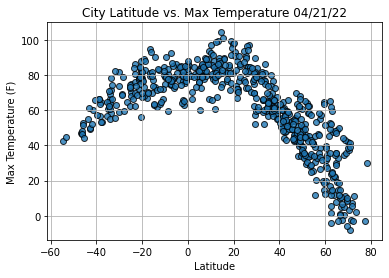

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

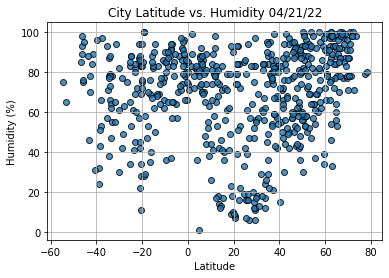

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

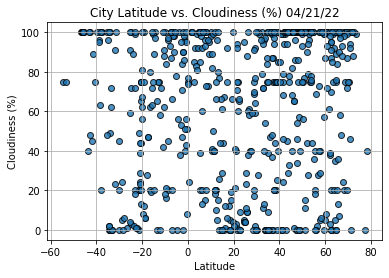

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

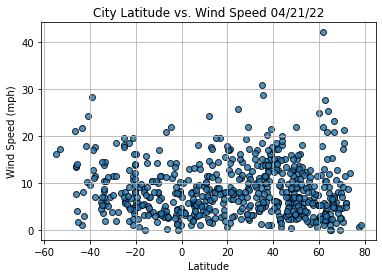

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
# Example of getting specific row from DF
index13 = city_data_df.loc[13]
index13

City               Port Macquarie
Country                        AU
Date          2022-04-21 16:47:06
Lat                      -31.4333
Lng                      152.9167
Max Temp                    62.89
Humidity                       94
Cloudiness                    100
Wind Speed                   6.91
Name: 13, dtype: object

In [26]:
# Filter DF to show northern hemisphere latitudes >= 0 
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
591     True
592     True
593     True
594     True
595     True
Name: Lat, Length: 596, dtype: bool

In [27]:
# New Dataframe that shows cities with al latitudes >= 0
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Konstantinovskiy,RU,2022-04-21 16:51:23,57.8301,39.5899,55.11,65,5,5.91
3,Jamestown,US,2022-04-21 16:51:23,42.0970,-79.2353,51.39,76,100,14.97
5,Dikson,RU,2022-04-21 16:51:25,73.5069,80.5464,2.10,98,99,12.12
6,Thompson,CA,2022-04-21 16:51:25,55.7435,-97.8558,30.36,37,20,10.36
8,Kodiak,US,2022-04-21 16:51:26,57.7900,-152.4072,38.71,81,40,6.91
...,...,...,...,...,...,...,...,...,...
591,Elat,IL,2022-04-21 17:07:29,29.5581,34.9482,78.64,17,0,17.27
592,Tatarbunary,UA,2022-04-21 17:07:29,45.8373,29.6142,52.05,59,100,13.31
593,Porto Novo,BJ,2022-04-21 17:07:30,6.4965,2.6036,84.47,69,100,8.48
594,Okhotsk,RU,2022-04-21 17:07:30,59.3833,143.3000,18.73,97,57,0.63


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

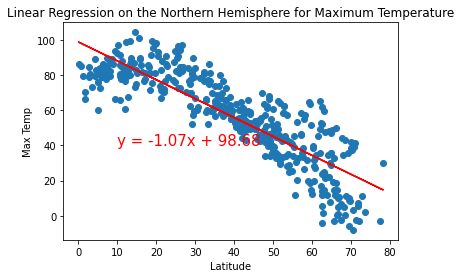

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

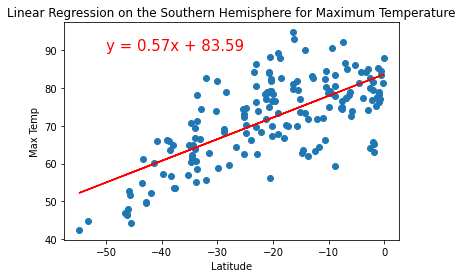

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

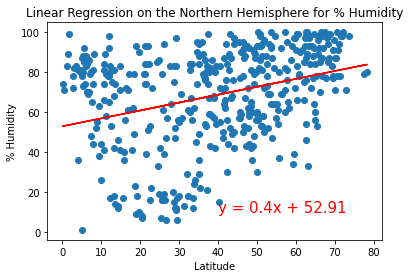

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

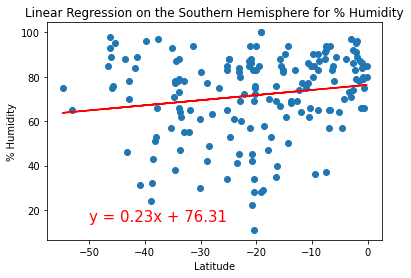

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

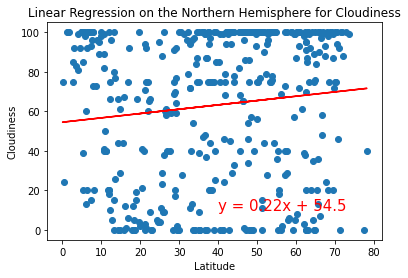

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

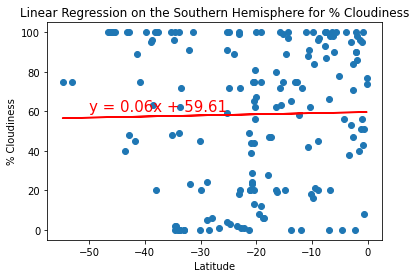

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

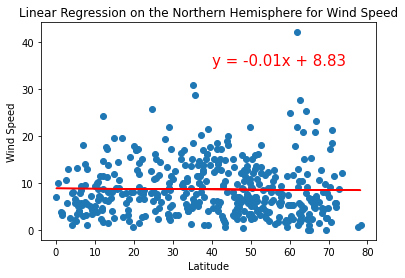

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

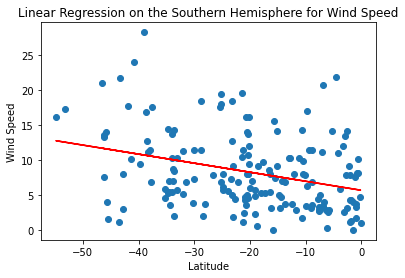

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))